In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

## Cargamos el dataset

In [21]:
df_crimes = pd.read_csv("../datasets/chicago_crimes_and_stations_2024_processed_outliers_encoded.csv")
test_df_crimes = pd.read_csv("../datasets/chicago_crimes_and_stations_2024_processed_outliers_encoded_test.csv")
df_crimes.describe()

,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station,Day_sin,Season_Spring,...,Day Time_Night,Arrest_tag,Domestic_tag,IUCR_freq,Primary_Type_freq,Location_Description_freq,FBI_Code_freq,Crime_District_freq,Nearest_Police_Station_District_freq,Nearest_Police_Station_District_Name_freq
count,200526.000000,200526.000000,200526.000000,2.005260e+05,2.005260e+05,200526.000000,200526.000000,200526.000000,2.005260e+05,200526.000000,...,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000
mean,1155.124438,23.118633,36.335288,1.165275e+06,1.887516e+06,41.846927,-87.668938,7.449605,6.461039e-03,0.246337,...,0.284896,0.136062,0.185477,0.039883,0.124980,0.135185,0.115510,0.048275,0.052489,0.052489
std,708.398514,13.939783,21.582439,1.621758e+04,3.161830e+04,0.086946,0.051482,0.595541,7.081667e-01,0.430878,...,0.451366,0.342855,0.388685,0.029088,0.074039,0.106824,0.074230,0.010845,0.022346,0.022346
min,111.000000,1.000000,1.000000,1.097306e+06,1.813897e+06,41.644590,-87.768200,5.372816,-9.749279e-01,0.000000,...,0.000000,0.000000,0.000000,0.000005,0.000005,0.000005,0.000010,0.000060,0.013120,0.013120
25%,533.000000,10.000000,22.000000,1.153917e+06,1.860269e+06,41.772038,-87.705488,7.128335,-7.818315e-01,0.000000,...,0.000000,0.000000,0.000000,0.010098,0.066101,0.023403,0.055783,0.040105,0.035965,0.035965
50%,1033.000000,23.000000,32.000000,1.167075e+06,1.894159e+06,41.865263,-87.656973,7.533998,-2.449294e-16,0.000000,...,0.000000,0.000000,0.000000,0.047435,0.111507,0.120448,0.085660,0.051350,0.047914,0.047914
75%,1731.000000,34.000000,53.000000,1.176712e+06,1.910357e+06,41.909852,-87.630560,7.831720,7.818315e-01,0.000000,...,1.000000,0.000000,0.000000,0.062765,0.179677,0.273356,0.148988,0.054008,0.066395,0.066395
max,2535.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,42.022537,-87.568349,9.443448,9.749279e-01,1.000000,...,1.000000,1.000000,1.000000,0.079576,0.228115,0.273356,0.231117,0.067433,0.094726,0.094726


## Normalización y estandarización - Escalado

Como vimos en el EDA, será necesario escalar las variables que representan coordenadas geográficas y la distancia a la estación de policía.

In [22]:
spatial_columns = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Distance Crime To Police Station']
df_subset = df_crimes[spatial_columns]
test_df_subset = test_df_crimes[spatial_columns]
df_subset.head()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
0,1186817.0,1860189.0,41.771470,-87.605748,7.221500
1,1179661.0,1873623.0,41.808501,-87.630560,7.230790
2,1145740.0,1853048.0,41.752749,-87.708864,8.289815
3,1184362.0,1861188.0,41.774269,-87.605748,6.913747
4,1137458.0,1907694.0,41.902858,-87.765574,7.494565


In [23]:
df_subset.describe()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
count,2.005260e+05,2.005260e+05,200526.000000,200526.000000,200526.000000
mean,1.165275e+06,1.887516e+06,41.846927,-87.668938,7.449605
std,1.621758e+04,3.161830e+04,0.086946,0.051482,0.595541
min,1.097306e+06,1.813897e+06,41.644590,-87.768200,5.372816
25%,1.153917e+06,1.860269e+06,41.772038,-87.705488,7.128335
50%,1.167075e+06,1.894159e+06,41.865263,-87.656973,7.533998
75%,1.176712e+06,1.910357e+06,41.909852,-87.630560,7.831720
max,1.205119e+06,1.951493e+06,42.022537,-87.568349,9.443448


### Evaluamos la distribución de los datos

Verificamos la distribución de las coordenadas y la distancia para ver si es posible asumir normalidad en alguna de ellas. Para esto utilizamos histogramas, QQ-plots y tests de normalidad.

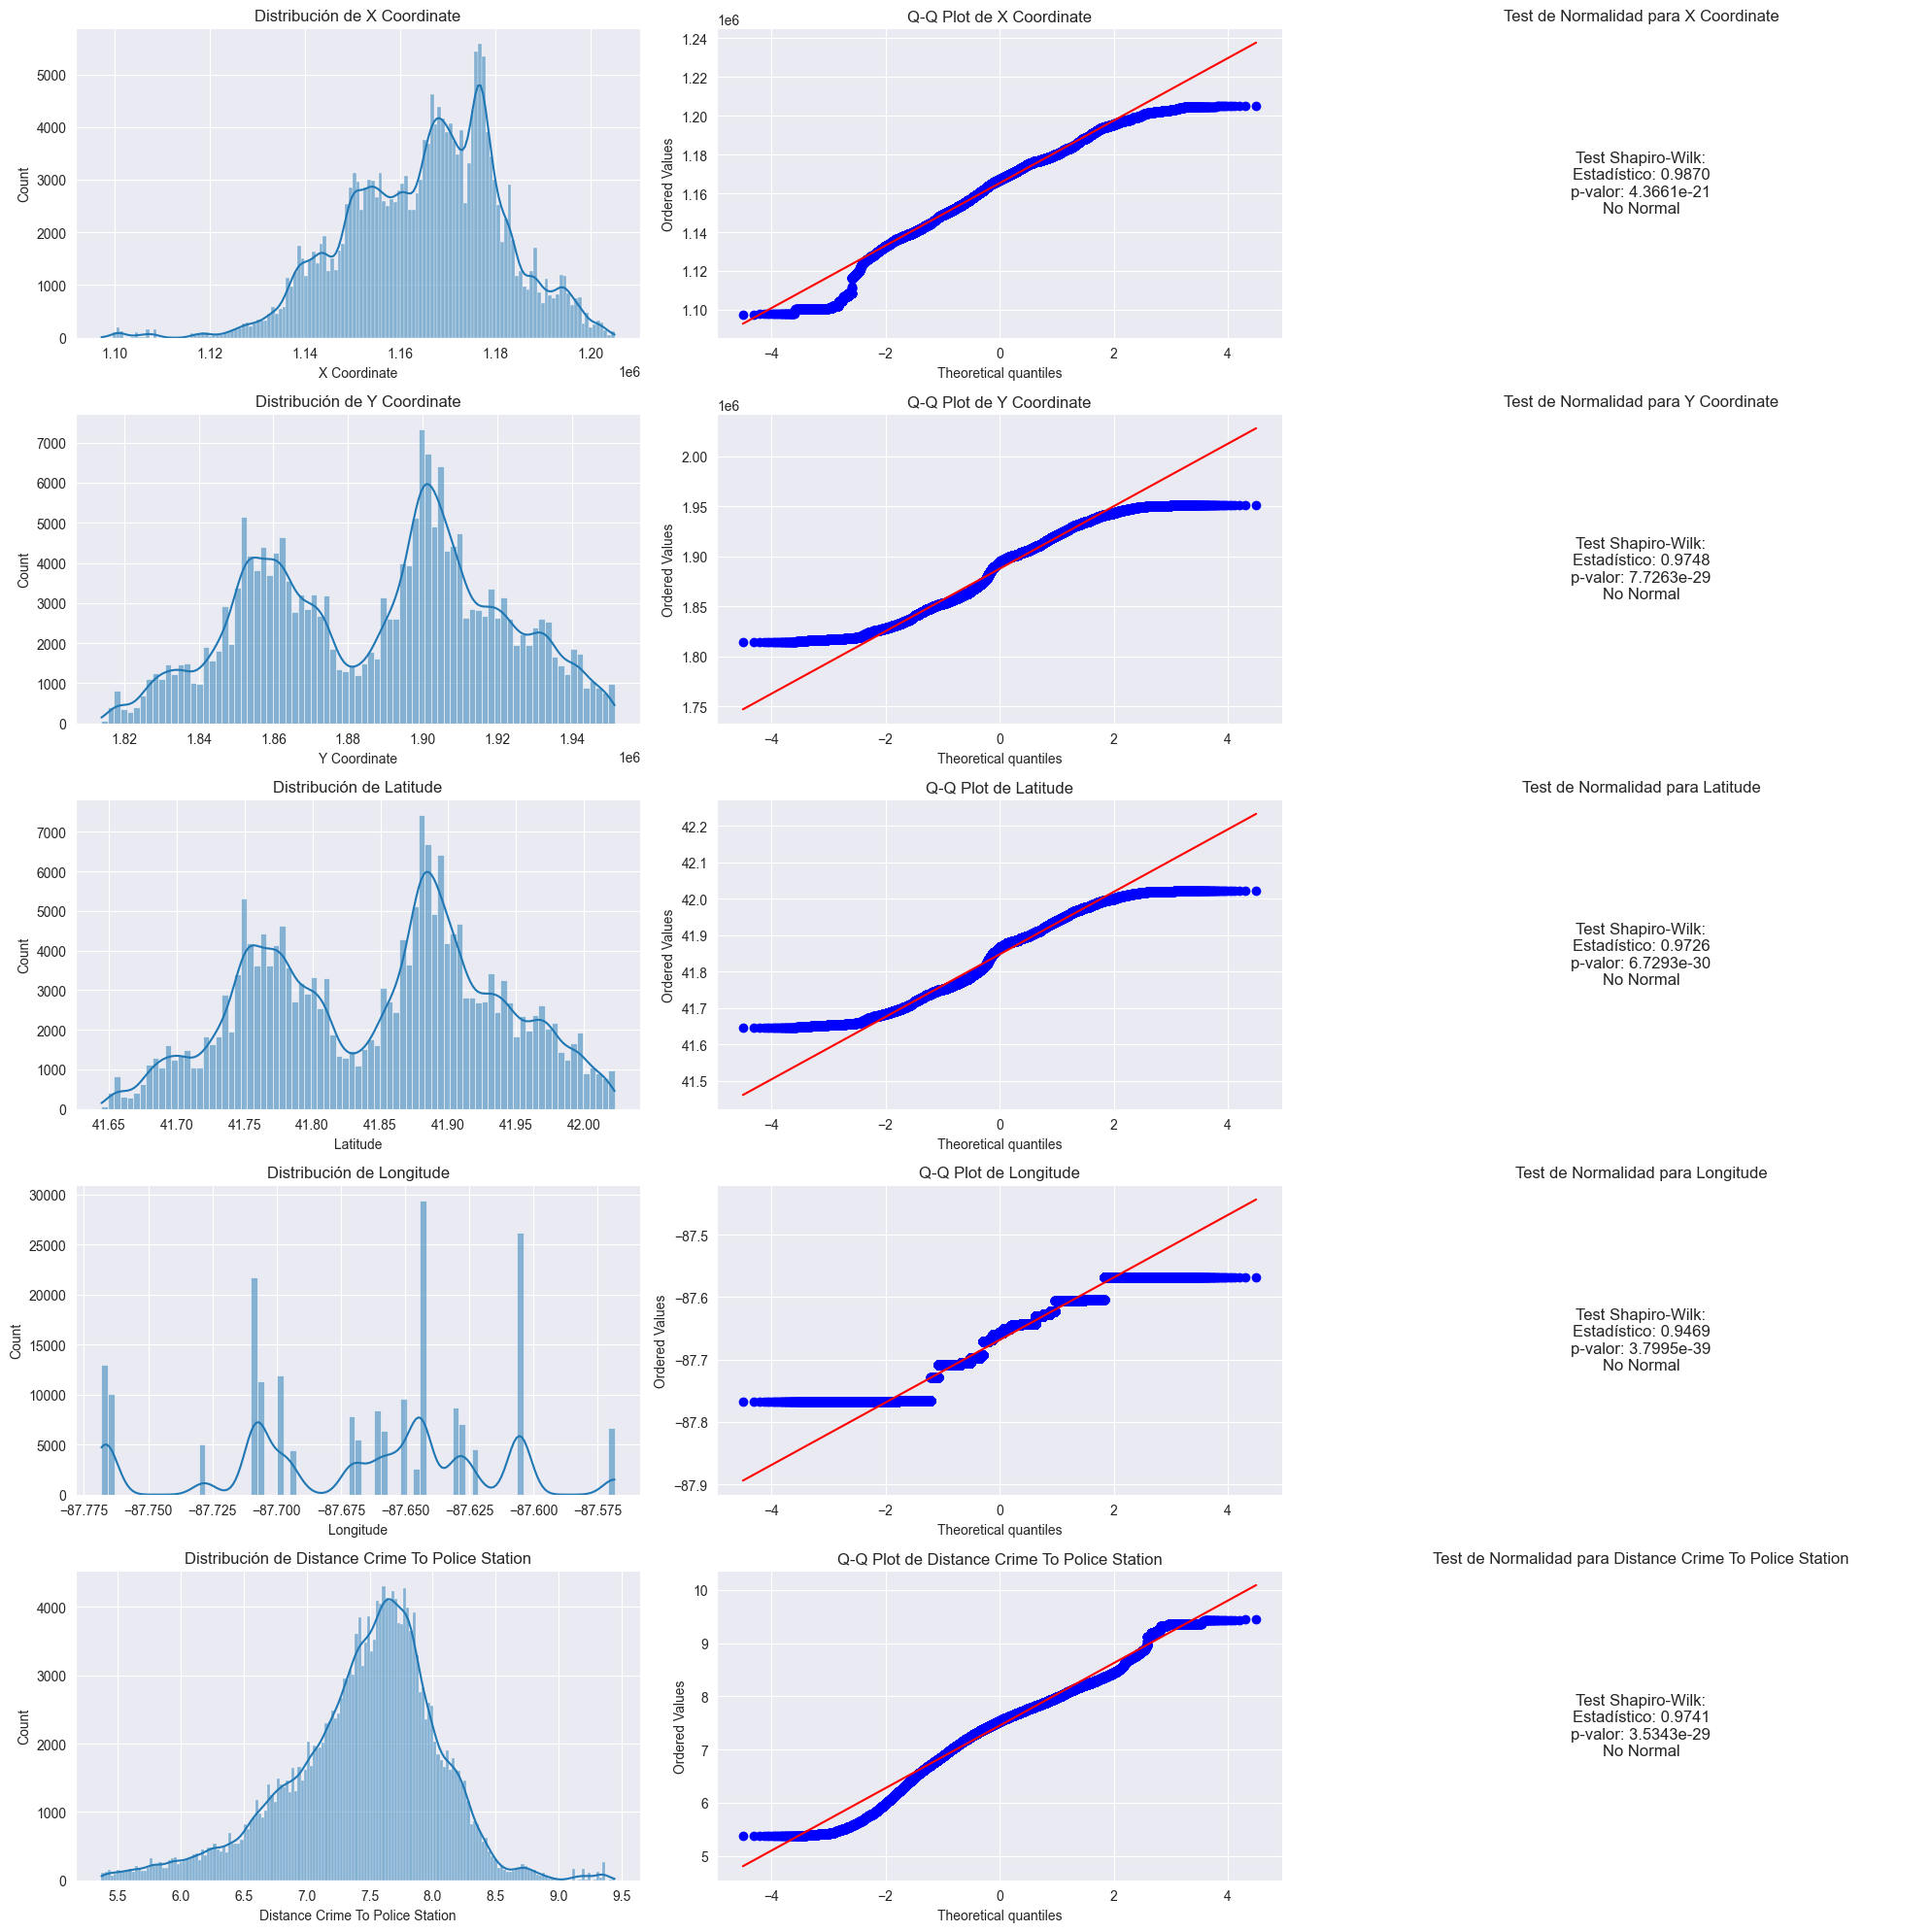

In [24]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(spatial_columns):
    plt.subplot(5, 3, i*3+1)
    sns.histplot(df_crimes[col], kde=True)
    plt.title(f'Distribución de {col}')

    # 2. QQ-plots para comparar con distribución normal
    plt.subplot(5, 3, i*3+2)
    stats.probplot(df_crimes[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')

    # 3. Test de normalidad Shapiro-Wilk
    stat, p_value = stats.shapiro(df_crimes[col].sample(min(5000, len(df_crimes))))
    plt.subplot(5, 3, i*3+3)
    plt.text(0.5, 0.5, f'Test Shapiro-Wilk:\nEstadístico: {stat:.4f}\np-valor: {p_value:.4e}\n{"Normal" if p_value > 0.05 else "No Normal"}',
             ha='center', va='center', fontsize=12)
    plt.axis('off')
    plt.title(f'Test de Normalidad para {col}')

plt.tight_layout()
plt.show()

Opciones de escalado:

1. Estandarización (StandardScaler):
    * Transforma los datos para que tengan media 0 y desviación estándar 1.
    * Útil cuando los datos siguen una distribución aproximadamente normal.
2. Normalización (MinMaxScaler):
    * Escala los datos al rango [0,1] o [-1,1].
    * Útil cuando no se asume una distribución específica.
3. RobustScaler:
    * Escala los datos usando la mediana y el rango intercuartílico en lugar de la media y desviación estándar.
    * Robusto ante valores atípicos.
4. QuantileTransformer:
    * Transforma las características para seguir una distribución específica.
    * Útil cuando se requiere una distribución específica.

Se podrían explorar también algunas transformaciones específicas para coordenadas geográficas. Las coordenadas geográficas tienen características especiales que pueden beneficiarse de transformaciones específicas:
1. Transformación Haversine
    * Para datos geoespaciales, una transformación común es convertir las coordenadas (latitud, longitud) en distancias relativas a un punto de referencia.
2. Transformación a coordenadas cartesianas
    * Otra opción es transformar las coordenadas geográficas a un sistema cartesiano local.

**Algunas observaciones adicionales**:
1. StandardScaler es menos sensible a valores atípicos que MinMaxScaler.
2. Robustez de StandardScaler:
    * Aunque se basa en la media y desviación estándar, StandardScaler puede ser útil incluso cuando los datos no son perfectamente normales.
    * Es más robusto ante valores atípicos que MinMaxScaler.
3. Cuándo usar MinMaxScaler:
    * Si los datos tienen una distribución claramente no normal
    * Si el algoritmo específico requiere datos en un rango acotado (como [0,1])
    * Si la interpretabilidad de los valores escalados es importante

### Comparamos los resultados de los distintos escaladores StandardScaler, MinMaxScaler, RobustScaler y QuantileTransformer

#### Normalización (Min-Max)

In [25]:
# Normalización (Min-Max)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)
print("Normalizado:\n", df_normalized.head())

Normalizado:
    X Coordinate  Y Coordinate  Latitude  Longitude  \
0      0.830243      0.336434  0.335710   0.812867   
1      0.763869      0.434068  0.433688   0.688712   
2      0.449241      0.284536  0.286175   0.296902   
3      0.807472      0.343695  0.343116   0.812867   
4      0.372423      0.681684  0.683346   0.013137   

   Distance Crime To Police Station  
0                          0.454152  
1                          0.456434  
2                          0.716596  
3                          0.378548  
4                          0.521233  


In [26]:
df_normalized.describe()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
count,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000
mean,0.630435,0.535040,0.535360,0.496681,0.510188
std,0.150423,0.229791,0.230047,0.257604,0.146302
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.525085,0.337016,0.337213,0.313793,0.431264
50%,0.647130,0.583316,0.583875,0.556552,0.530920
75%,0.736514,0.701036,0.701852,0.688712,0.604060
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Estandarización (Z-Score)

In [27]:
# Estandarización (Z-Score)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)
test_df_standardized = pd.DataFrame(scaler.transform(test_df_subset), columns=test_df_subset.columns)
print("\nEstandarizado:\n", df_standardized.head())


Estandarizado:
    X Coordinate  Y Coordinate  Latitude  Longitude  \
0      1.328311     -0.864290 -0.867868   1.227417   
1      0.887060     -0.439408 -0.441960   0.745457   
2     -1.204564     -1.090141 -1.083194  -0.775529   
3      1.176932     -0.832694 -0.835673   1.227417   
4     -1.715246      0.638166  0.643290  -1.877089   

   Distance Crime To Police Station  
0                         -0.383022  
1                         -0.367422  
2                          1.410839  
3                         -0.899786  
4                          0.075496  


In [28]:
df_standardized.describe()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
count,2.005260e+05,2.005260e+05,2.005260e+05,2.005260e+05,2.005260e+05
mean,-2.884323e-15,-2.555354e-15,-2.555595e-14,1.072070e-13,-1.797210e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-4.191084e+00,-2.328382e+00,-2.327182e+00,-1.928085e+00,-3.487239e+00
25%,-7.003569e-01,-8.617598e-01,-8.613332e-01,-7.099591e-01,-5.394606e-01
50%,1.109869e-01,2.100905e-01,2.108934e-01,2.324183e-01,1.417085e-01
75%,7.052047e-01,7.223821e-01,7.237332e-01,7.454569e-01,6.416292e-01
max,2.456842e+00,2.023412e+00,2.019769e+00,1.953857e+00,3.347962e+00


#### Escalado robusto (RobustScaler)

In [29]:
# Escalado robusto (RobustScaler)
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)
print("\nEscalado robusto:\n", df_robust.head())


Escalado robusto:
    X Coordinate  Y Coordinate  Latitude  Longitude  \
0      0.866077     -0.678210 -0.680578   0.683652   
1      0.552145     -0.410000 -0.411877   0.352503   
2     -0.935961     -0.820780 -0.816424  -0.692549   
3      0.758376     -0.658265 -0.660267   0.683652   
4     -1.299290      0.270226  0.272794  -1.449419   

   Distance Crime To Police Station  
0                         -0.444276  
1                         -0.431069  
2                          1.074542  
3                         -0.881808  
4                         -0.056061  


In [30]:
df_robust.describe()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
count,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000
mean,-0.078963,-0.132621,-0.133050,-0.159692,-0.119981
std,0.711461,0.631258,0.630890,0.687090,0.846678
min,-3.060749,-1.602428,-1.601242,-1.484458,-3.072542
25%,-0.577238,-0.676613,-0.676455,-0.647497,-0.576729
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.422762,0.323387,0.323545,0.352503,0.423271
max,1.668981,1.144671,1.141199,1.182781,2.714657


#### Escalado con quantiles (QuantileTransformer)

In [31]:
# Escalado con quantiles (QuantileTransformer)
qt_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df_qt = pd.DataFrame(qt_transformer.fit_transform(df_subset), columns=df_subset.columns)
print("\nEscalado con quantiles:\n", df_qt.head())


Escalado con quantiles:
    X Coordinate  Y Coordinate  Latitude  Longitude  \
0      1.385326     -0.651379 -0.657115   1.171890   
1      0.941265     -0.298122 -0.301173   0.678433   
2     -1.139266     -0.939876 -0.927407  -0.931971   
3      1.274311     -0.612090 -0.617163   1.171890   
4     -1.684333      0.573809  0.580636  -1.318946   

   Distance Crime To Police Station  
0                         -0.523669  
1                         -0.510829  
2                          1.663862  
3                         -0.960716  
4                         -0.065681  


In [32]:
df_qt.describe()

,X Coordinate,Y Coordinate,Latitude,Longitude,Distance Crime To Police Station
count,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000
mean,-0.004552,0.002687,0.002561,-0.020135,-0.004520
std,0.990698,0.994992,0.994791,1.590273,0.993251
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.671257,-0.648857,-0.650661,-0.592444,-0.672710
50%,-0.006375,0.003111,0.001347,0.013801,0.003920
75%,0.657435,0.681142,0.681015,0.678433,0.653698
max,5.199338,5.199338,5.199338,5.199338,5.199338


#### Comparamos resultados

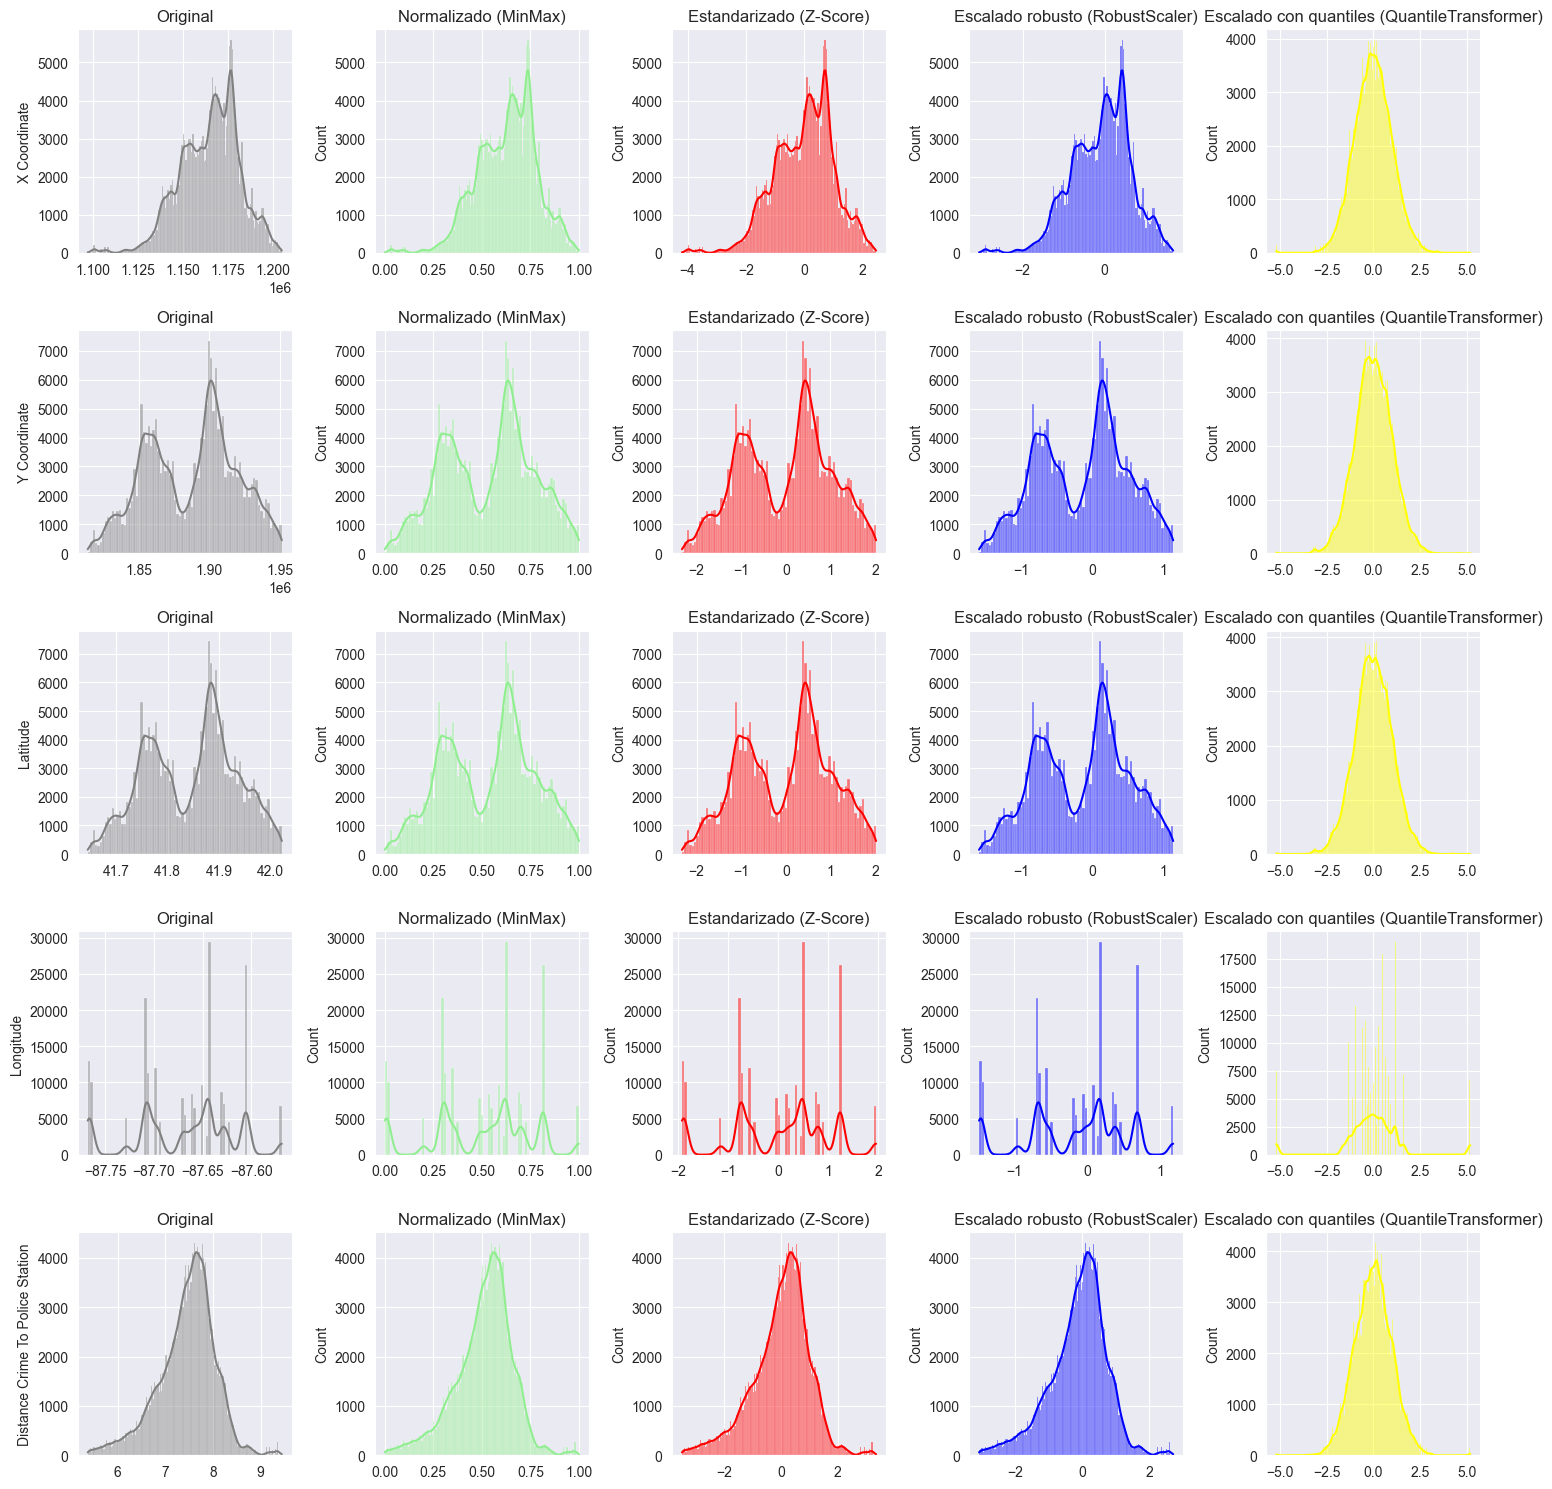

In [33]:
# Gráfico
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
titles = ["Original", "Normalizado (MinMax)", "Estandarizado (Z-Score)", "Escalado robusto (RobustScaler)", "Escalado con quantiles (QuantileTransformer)"]

# Recorrer cada variable y graficarla en las tres columnas
for i, col in enumerate(spatial_columns):
    sns.histplot(df_subset[col], kde=True, ax=axes[i, 0], color="gray")
    sns.histplot(df_normalized[col], kde=True, ax=axes[i, 1], color="lightgreen")
    sns.histplot(df_standardized[col], kde=True, ax=axes[i, 2], color="red")
    sns.histplot(df_robust[col], kde=True, ax=axes[i, 3], color="blue")
    sns.histplot(df_qt[col], kde=True, ax=axes[i, 4], color="yellow")

    # Etiquetas
    axes[i, 0].set_ylabel(col)
    for j in range(5):
        axes[i, j].set_xlabel("")
        axes[i, j].set_title(titles[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

Viendo las gráficas resultantes, elegimos utilizar StandardScaler para la construcción del dataset final porque:

* Los resultados entre escaladores fueron muy similares, lo que indica que ninguna variable sufrió transformaciones drásticas ni dependía fuertemente de la presencia de outliers.

* StandardScaler es simple, interpretable y ampliamente compatible con la mayoría de los algoritmos de machine learning.

* Preserva la estructura y relaciones lineales originales entre variables, lo cual es ideal cuando los valores tienen significado espacial (como coordenadas o distancias).

* Aunque otros métodos como RobustScaler o QuantileTransformer podrían manejar mejor casos con asimetría u outliers, en este dataset el impacto era mínimo tras la transformación logarítmica previa y la limpieza de datos.

Continuar con StandardScaler nos ofrece un buen balance entre consistencia estadística, interpretabilidad y compatibilidad con modelos posteriores.

## Salvamos en un archivo

In [34]:
# Recorrer cada variable y reemplazarla en dataset original
for i, col in enumerate(spatial_columns):
    df_crimes[f"{col}_standardized"] = df_standardized[col]
    test_df_crimes[f"{col}_standardized"] = test_df_standardized[col]

test_df_crimes.drop(columns=spatial_columns, inplace=True)
df_crimes.drop(columns=spatial_columns, inplace=True)

In [ ]:
df_crimes.to_csv("../datasets/chicago_crimes_and_stations_2024_processed_outliers_encoded_standardized.csv", index=False)
test_df_crimes.to_csv("../datasets/chicago_crimes_and_stations_2024_processed_outliers_encoded_standardized_test.csv", index=False)
df_crimes.describe()

,Beat,Ward,Community Area,Day_sin,Season_Spring,Season_Summer,Season_Winter,Day Time_Early Morning,Day Time_Morning,Day Time_Night,...,Location_Description_freq,FBI_Code_freq,Crime_District_freq,Nearest_Police_Station_District_freq,Nearest_Police_Station_District_Name_freq,X Coordinate_standardized,Y Coordinate_standardized,Latitude_standardized,Longitude_standardized,Distance Crime To Police Station_standardized
count,200526.000000,200526.000000,200526.000000,2.005260e+05,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,...,200526.000000,200526.000000,200526.000000,200526.000000,200526.000000,2.005260e+05,2.005260e+05,2.005260e+05,2.005260e+05,2.005260e+05
mean,1155.124438,23.118633,36.335288,6.461039e-03,0.246337,0.271675,0.229018,0.199186,0.205849,0.284896,...,0.135185,0.115510,0.048275,0.052489,0.052489,-2.884323e-15,-2.555354e-15,-2.555595e-14,1.072070e-13,-1.797210e-16
std,708.398514,13.939783,21.582439,7.081667e-01,0.430878,0.444825,0.420202,0.399389,0.404321,0.451366,...,0.106824,0.074230,0.010845,0.022346,0.022346,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,111.000000,1.000000,1.000000,-9.749279e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000005,0.000010,0.000060,0.013120,0.013120,-4.191084e+00,-2.328382e+00,-2.327182e+00,-1.928085e+00,-3.487239e+00
25%,533.000000,10.000000,22.000000,-7.818315e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023403,0.055783,0.040105,0.035965,0.035965,-7.003569e-01,-8.617598e-01,-8.613332e-01,-7.099591e-01,-5.394606e-01
50%,1033.000000,23.000000,32.000000,-2.449294e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.120448,0.085660,0.051350,0.047914,0.047914,1.109869e-01,2.100905e-01,2.108934e-01,2.324183e-01,1.417085e-01
75%,1731.000000,34.000000,53.000000,7.818315e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.273356,0.148988,0.054008,0.066395,0.066395,7.052047e-01,7.223821e-01,7.237332e-01,7.454569e-01,6.416292e-01
max,2535.000000,50.000000,77.000000,9.749279e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.273356,0.231117,0.067433,0.094726,0.094726,2.456842e+00,2.023412e+00,2.019769e+00,1.953857e+00,3.347962e+00
